In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pandas as pd

In [ ]:
# Suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Importing dataset and converting to dataframe
data = pd.read_csv('heart.csv', header=None)
df = pd.DataFrame(data)  # Dataframe

Text(0.5, 1.0, 'Original Data')

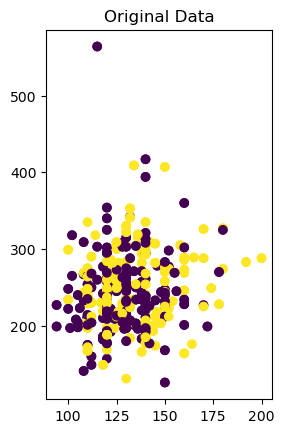

In [4]:
# Extracting columns x and y
x = df.iloc[:, 0:13]
y = df.iloc[:, 13]
y = y - 1

In [ ]:
# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [5]:
#perform logistic regression
c = 3 #1/lambda	(regularisation contant)
model = LogisticRegression(C = c)

In [6]:
#10-fold cross validation
scores = cross_val_score(model, x, y, scoring='accuracy', cv=10)
print ("10-Fold Accuracy : ", scores.mean()*100)

10-Fold Accuracy :  84.12280701754386


In [7]:
#creation of the confusion matrix
model = model.fit(x_train,y_train)
print ("Testing Accuracy : ",model.score(x_test, y_test)*100)
predicted = model.predict(x)

Testing Accuracy :  84.14096916299559


In [8]:
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(x[3],x[4], c=predicted)
ax2.set_title("Logistic Regression")

Text(0.5, 1.0, 'Logistic Regression')

In [11]:
cm = metrics.confusion_matrix(y, predicted)
print (cm/len(y))
print (metrics.classification_report(y, predicted))


plt.show()

[[0.47619048 0.07054674]
 [0.07054674 0.38271605]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       310
           1       0.84      0.84      0.84       257

    accuracy                           0.86       567
   macro avg       0.86      0.86      0.86       567
weighted avg       0.86      0.86      0.86       567

